#### 1: Setup and Styling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cleaned_affiliate_performance.csv')

plt.style.use('seaborn-v0_8-muted')
sns.set_palette("viridis")
print("Environment Ready.")

Environment Ready.


#### 2.The "Profitability vs. Risk" Scatter Plot

Identifying the 'Danger Zone' This scatter plot visualizes the relationship between Deposits and Bonuses. 
Affiliates above the trend line are 'Bonus Heavy' and represent high financial risk.

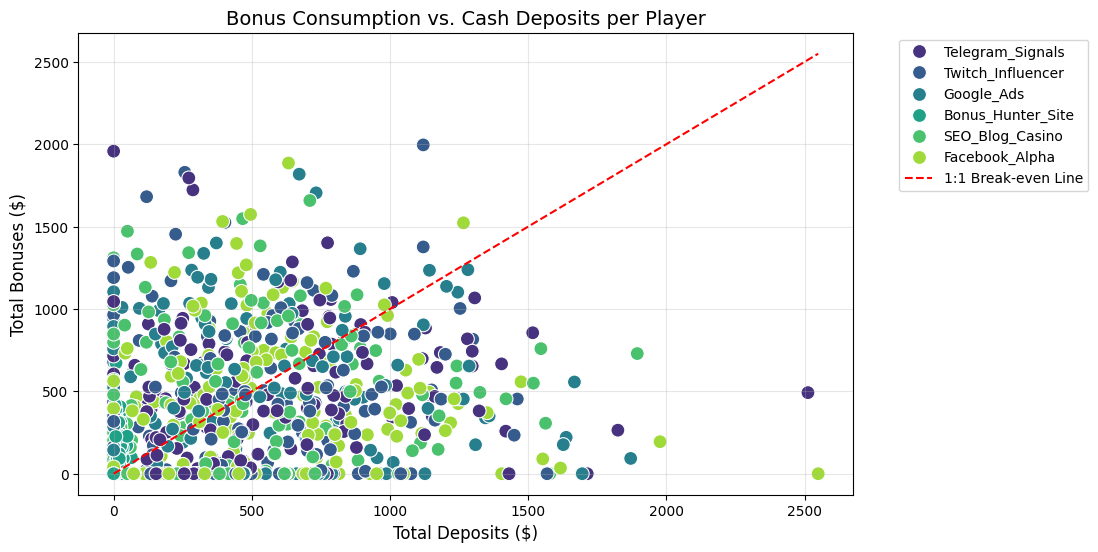

In [2]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Deposit', y='Bonus', hue='affiliate_name', s=100)

plt.plot([0, df['Deposit'].max()], [0, df['Deposit'].max()], 'r--', label='1:1 Break-even Line')

plt.title('Bonus Consumption vs. Cash Deposits per Player', fontsize=14)
plt.xlabel('Total Deposits ($)', fontsize=12)
plt.ylabel('Total Bonuses ($)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

#### 3. NGR Distribution by Affiliate

Net Gaming Revenue (NGR) Breakdown This bar chart clearly ranks partners by their financial contribution. 
Negative values indicate partners that are currently costing the company money.

C:\Users\Eldu\AppData\Local\Temp\ipykernel_8996\1561116945.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=aff_summary, x='NGR', y='affiliate_name', palette=colors)


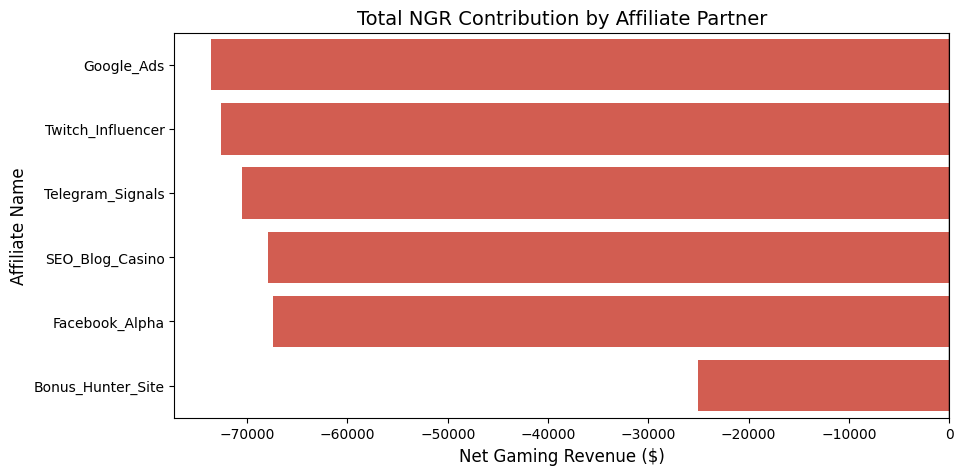

In [3]:
aff_summary = df.groupby('affiliate_name')['NGR'].sum().sort_values().reset_index()

plt.figure(figsize=(10, 5))
colors = ['#e74c3c' if x < 0 else '#2ecc71' for x in aff_summary['NGR']]

sns.barplot(data=aff_summary, x='NGR', y='affiliate_name', palette=colors)
plt.axvline(0, color='black', lw=1) # Baseline at zero

plt.title('Total NGR Contribution by Affiliate Partner', fontsize=14)
plt.xlabel('Net Gaming Revenue ($)', fontsize=12)
plt.ylabel('Affiliate Name', fontsize=12)
plt.show()

#### 4. Daily Registration Trends (The Anomaly View)

Traffic Integrity Monitoring Visualizing daily registrations to highlight the bot-spike detected via Z-Score.

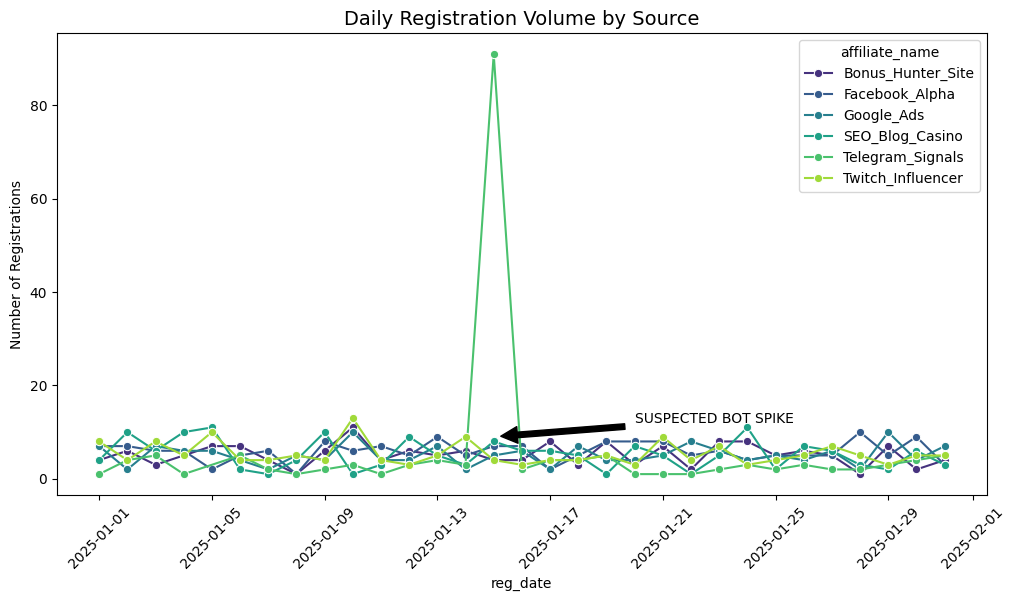

In [4]:
df['reg_date'] = pd.to_datetime(df['reg_date'])
daily_regs = df.groupby(['reg_date', 'affiliate_name']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_regs, x='reg_date', y='count', hue='affiliate_name', marker='o')

plt.annotate('SUSPECTED BOT SPIKE', 
             xy=(pd.to_datetime('2025-01-15'), 9), 
             xytext=(pd.to_datetime('2025-01-20'), 12),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.title('Daily Registration Volume by Source', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Number of Registrations')
plt.show()

#### 5. The "Quality Score" Heatmap

Regional Quality Analysis (Bonus Ratio) This heatmap identifies which country-affiliate combinations are high risk. 
A ratio > 1.0 (appearing in darker red) indicates that players from that segment are consuming more in bonuses than they are depositing in cash.

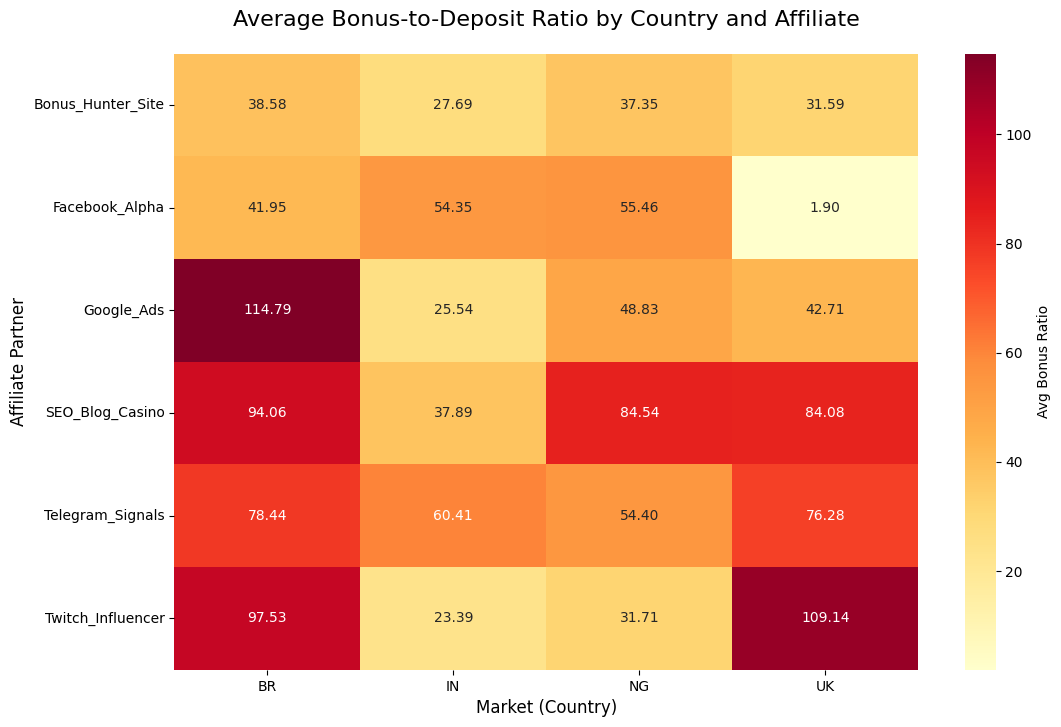

In [6]:
# 1. Calculate the per-player Bonus Ratio if not already done
# We add +1 to Deposit to avoid 'Division by Zero' errors
df['bonus_ratio'] = df['Bonus'] / (df['Deposit'] + 1)

# 2. Create the pivot table using 'bonus_ratio'
heatmap_data = df.pivot_table(
    index='affiliate_name', 
    columns='country', 
    values='bonus_ratio', 
    aggfunc='mean'
)

# 3. Plotting the Heatmap
plt.figure(figsize=(12, 8))

sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='YlOrRd', cbar_kws={'label': 'Avg Bonus Ratio'})

plt.title('Average Bonus-to-Deposit Ratio by Country and Affiliate', fontsize=16, pad=20)
plt.ylabel('Affiliate Partner', fontsize=12)
plt.xlabel('Market (Country)', fontsize=12)

plt.show()